In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import gmplot
import IPython
%matplotlib inline

In [2]:
trip = pd.read_csv('data/cycle-share-dataset/trip.csv')
trip.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/14 10:31,10/13/14 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/14 10:32,10/13/14 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/14 10:33,10/13/14 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/14 10:34,10/13/14 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/14 10:34,10/13/14 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [3]:
trip['starttime_datetime'] = pd.to_datetime(trip['starttime'],infer_datetime_format=True)
trip['stoptime_datetime'] = pd.to_datetime(trip['stoptime'],infer_datetime_format=True)

In [26]:
def get_month(datetime):
    return datetime.month
def get_day(datetime):
    return datetime.day

def check_start_enddate(row):
    if row.starttime_datetime.day != row.stoptime_datetime.day:
        return row.stoptime_datetime.day - row.starttime_datetime.day;
    else:
        return 0
stre = trip.apply(check_start_enddate, axis = 1)


In [27]:
trip[stre > 0]

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_datetime,stoptime_datetime
408,908,10/13/14 23:12,10/14/14 6:52,SEA00230,27583.945,7th Ave & Union St,2nd Ave & Pine St,CBD-03,CBD-13,Short-Term Pass Holder,NaN,NaN,2014-10-13 23:12:00,2014-10-14 06:52:00
894,1473,10/14/14 22:25,10/15/14 4:29,SEA00140,21834.346,Harvard Ave & E Pine St,1st Ave & Marion St,CH-09,CBD-05,Short-Term Pass Holder,NaN,NaN,2014-10-14 22:25:00,2014-10-15 04:29:00
895,1474,10/14/14 22:26,10/15/14 4:29,SEA00084,21776.479,Harvard Ave & E Pine St,1st Ave & Marion St,CH-09,CBD-05,Short-Term Pass Holder,NaN,NaN,2014-10-14 22:26:00,2014-10-15 04:29:00
899,1478,10/14/14 23:59,10/15/14 0:01,SEA00203,153.630,6th Ave S & S King St,King Street Station Plaza / 2nd Ave Extension ...,ID-04,PS-05,Member,Male,1974.0,2014-10-14 23:59:00,2014-10-15 00:01:00
1605,2305,10/16/14 23:49,10/17/14 0:03,SEA00443,821.747,12th Ave & NE Campus Pkwy,9th Ave N & Mercer St,UD-04,DPD-01,Member,Male,1986.0,2014-10-16 23:49:00,2014-10-17 00:03:00
1606,2308,10/16/14 23:52,10/17/14 0:00,SEA00193,459.631,UW Engineering Library / E Stevens Way NE & Je...,NE 47th St & 12th Ave NE,UW-06,UD-07,Member,Male,1990.0,2014-10-16 23:52:00,2014-10-17 00:00:00
1607,2309,10/16/14 23:59,10/17/14 0:07,SEA00263,495.990,2nd Ave & Spring St,2nd Ave & Blanchard St,CBD-06,BT-05,Short-Term Pass Holder,NaN,NaN,2014-10-16 23:59:00,2014-10-17 00:07:00
1901,2649,10/17/14 23:57,10/18/14 0:10,SEA00365,761.041,Harvard Ave & E Pine St,Fred Hutchinson Cancer Research Center / Fairv...,CH-09,EL-01,Short-Term Pass Holder,NaN,NaN,2014-10-17 23:57:00,2014-10-18 00:10:00
2297,3112,10/18/14 23:29,10/19/14 0:22,SEA00030,3197.308,Key Arena / 1st Ave N & Harrison St,NE 42nd St & University Way NE,SLU-19,UD-02,Short-Term Pass Holder,NaN,NaN,2014-10-18 23:29:00,2014-10-19 00:22:00
2300,3115,10/18/14 23:53,10/19/14 0:04,SEA00205,687.089,Cal Anderson Park / 11th Ave & Pine St,REI / Yale Ave N & John St,CH-08,SLU-01,Short-Term Pass Holder,NaN,NaN,2014-10-18 23:53:00,2014-10-19 00:04:00


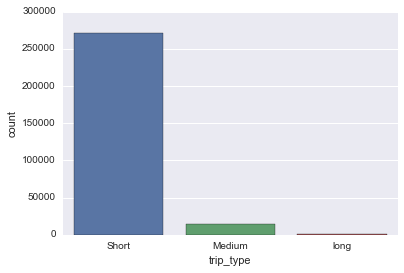

In [46]:
# Groups to be created
'''
trip Duration:
    < 1 hour
    1 - 5 Hours
    5 - 12 Hours
    > 1 day

Month: the month of the year
Day: Day of the week

time of the day:
    early_morning = 5:00am - 8:00am
    morning_rush = 8:00 am - 11:00 am
    afternoon = 11:00 am - 2:00 pm
    midday = 2:00 pm - 5:00 pm
    Evening_rush = 5:00pm - 8:00pm
    night_time = 8:00pm - 5:00am
''' 
def get_trip_duration(secs):
    hours = secs / 3600
    if hours < 1.0:
        return 'Short'
    elif (hours >= 1.0) & (hours < 5.0):
        return 'Medium'
    elif hours >= 5.0:
        return 'long'

def get_dayofweek(datetime):
    return datetime.weekday()

def time_of_day(datetime):
    hour_of_day = datetime.hour
    if (hour_of_day >= 5) & (hour_of_day < 8):
        return 'early_morning'
    elif (hour_of_day >= 8) & (hour_of_day < 11):
        return 'morning_rush'
    elif (hour_of_day >= 11) & (hour_of_day < 14):
        return 'afternoon'
    elif (hour_of_day >= 14) & (hour_of_day < 17):
        return 'midday'
    elif (hour_of_day >= 17) & (hour_of_day < 20):
        return 'Evening_rush'
    elif (hour_of_day >= 20) | (hour_of_day < 5):
        return 'night_time'

trip['trip_type'] = trip['tripduration'].apply(get_trip_duration)
trip['day_of_week'] = trip['starttime_datetime'].apply(get_dayofweek)
trip['month'] = trip['starttime_datetime'].apply(get_month)
trip['time_of_day'] = trip['starttime_datetime'].apply(time_of_day)

sns.countplot(trip['trip_type'])

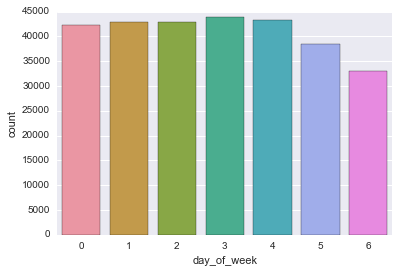

In [40]:
sns.countplot(trip['day_of_week'])

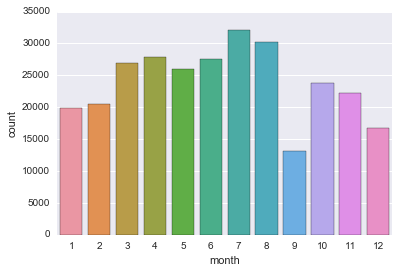

In [41]:
sns.countplot(trip['month'])

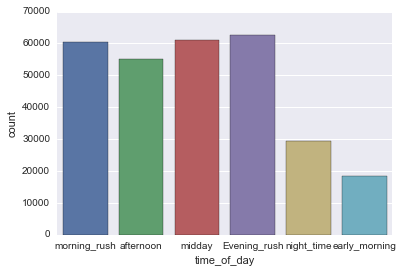

In [47]:
sns.countplot(trip['time_of_day'])

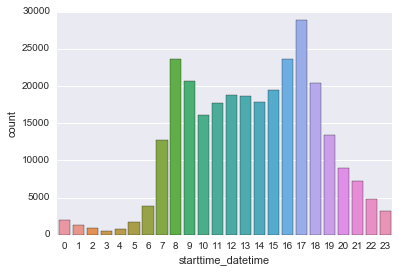

In [49]:
def hour_of_day(datetime):
    return datetime.hour
sns.countplot(trip['starttime_datetime'].apply(hour_of_day))

In [62]:
uni_trip = trip[['from_station_id', 'to_station_id']].groupby(['from_station_id', 'to_station_id']).agg('size').reset_index().sort_values(by = 0, ascending = False)


In [63]:
uni_trip

,from_station_id,to_station_id,0
2867,WF-01,WF-01,4881
2869,WF-01,WF-04,2683
2941,WF-04,WF-01,1930
2943,WF-04,WF-04,1358
10,BT-01,CBD-13,1247
2063,SLU-17,SLU-17,1119
478,CBD-13,BT-01,1111
2845,WF-01,PS-05,1054
896,CH-07,SLU-16,1040
2369,UD-01,UD-01,1005


In [67]:
trip[trip.from_station_id == 'WF-01']

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_datetime,stoptime_datetime,trip_type,day_of_week,month,time_of_day
133,579,10/13/14 13:45,10/13/14 14:09,SEA00461,1467.996,Pier 69 / Alaskan Way & Clay St,Westlake Ave & 6th Ave,WF-01,SLU-15,Short-Term Pass Holder,NaN,NaN,2014-10-13 13:45:00,2014-10-13 14:09:00,Short,0,10,afternoon
135,581,10/13/14 13:46,10/13/14 14:09,SEA00236,1414.177,Pier 69 / Alaskan Way & Clay St,Westlake Ave & 6th Ave,WF-01,SLU-15,Short-Term Pass Holder,NaN,NaN,2014-10-13 13:46:00,2014-10-13 14:09:00,Short,0,10,afternoon
297,773,10/13/14 17:28,10/13/14 17:52,SEA00445,1438.596,Pier 69 / Alaskan Way & Clay St,3rd Ave & Broad St,WF-01,BT-01,Short-Term Pass Holder,NaN,NaN,2014-10-13 17:28:00,2014-10-13 17:52:00,Short,0,10,Evening_rush
298,774,10/13/14 17:28,10/13/14 17:52,SEA00050,1427.933,Pier 69 / Alaskan Way & Clay St,3rd Ave & Broad St,WF-01,BT-01,Short-Term Pass Holder,NaN,NaN,2014-10-13 17:28:00,2014-10-13 17:52:00,Short,0,10,Evening_rush
300,777,10/13/14 17:30,10/13/14 17:52,SEA00043,1329.031,Pier 69 / Alaskan Way & Clay St,3rd Ave & Broad St,WF-01,BT-01,Short-Term Pass Holder,NaN,NaN,2014-10-13 17:30:00,2014-10-13 17:52:00,Short,0,10,Evening_rush
302,780,10/13/14 17:30,10/13/14 17:52,SEA00263,1290.055,Pier 69 / Alaskan Way & Clay St,3rd Ave & Broad St,WF-01,BT-01,Short-Term Pass Holder,NaN,NaN,2014-10-13 17:30:00,2014-10-13 17:52:00,Short,0,10,Evening_rush
307,787,10/13/14 17:35,10/13/14 17:48,SEA00062,791.359,Pier 69 / Alaskan Way & Clay St,Dexter Ave & Denny Way,WF-01,SLU-18,Member,Male,1985.0,2014-10-13 17:35:00,2014-10-13 17:48:00,Short,0,10,Evening_rush
369,859,10/13/14 19:14,10/13/14 19:47,SEA00213,1992.021,Pier 69 / Alaskan Way & Clay St,Bellevue Ave & E Pine St,WF-01,CH-12,Short-Term Pass Holder,NaN,NaN,2014-10-13 19:14:00,2014-10-13 19:47:00,Short,0,10,Evening_rush
475,983,10/14/14 9:12,10/14/14 13:20,SEA00181,14885.176,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,NaN,NaN,2014-10-14 09:12:00,2014-10-14 13:20:00,Medium,1,10,morning_rush
514,1027,10/14/14 10:59,10/14/14 11:01,SEA00473,119.873,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,NaN,NaN,2014-10-14 10:59:00,2014-10-14 11:01:00,Short,1,10,morning_rush


In [69]:
from mpl_toolkits.basemap import Basemap, cm

ImportError: No module named basemap

In [5]:
station = pd.read_csv('data/cycle-share-dataset/station.csv')
station.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [6]:
min_lat = station.lat.min()
max_lat = station.lat.max()

min_long = station.long.min()
max_long = station.long.max()

In [69]:
out_traffic = trip[['from_station_id']]
out_traffic.columns = ['station_id']
out_trafic = pd.merge(out_trafic, station, on='station_id')

# declare the center of the map, and how much we want the map zoomed in
gmap = gmplot.GoogleMapPlotter(47.63, -122.33,12)

gmap.heatmap(out_trafic.lat, out_trafic.long)
gmap.draw("mymap.html")

url = 'some url....'
iframe = '<iframe src=' + 'mymap.html' + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

In [70]:
in_trafic = trip[['to_station_id']]
in_trafic.columns = ['station_id']
in_trafic = pd.merge(in_trafic, station, on='station_id')

# declare the center of the map, and how much we want the map zoomed in
gmap = gmplot.GoogleMapPlotter(47.63, -122.33,12)

gmap.heatmap(in_trafic.lat, in_trafic.long)
gmap.draw("mymap.html")

url = 'some url....'
iframe = '<iframe src=' + 'mymap.html' + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

In [73]:
tot_traffic = in_trafic.append(out_trafic)

gmap.heatmap(tot_traffic.lat, tot_traffic.long)
gmap.draw("mymap.html")

url = 'some url....'
iframe = '<iframe src=' + 'mymap.html' + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

NameError: name 'out_trafic' is not defined

In [65]:
# plot heatmap
gmap.heatmap(station.lat, station.long)

gmap.draw("mymap.html")

url = 'some url....'
iframe = '<iframe src=' + 'mymap.html' + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

In [71]:
len(in_trafic.lat*3)

286834

In [72]:
len(in_trafic.lat)

286834